In [1]:
import pandas as pd

data=pd.read_csv("Pumadataset.csv")
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1762587173642019301,Tue Feb 27 21:15:04 +0000 2024,0,Future Pumas! The time is here! Offers are ava...,1762587173642019301,https://pbs.twimg.com/media/GHX3sVQWkAAy0AP.jpg,NaN,en,"Chicago, IL",0,0.0,0,https://twitter.com/BeNobleJCP/status/17625871...,7.815846e+17,BeNobleJCP
1,1762512735126864208,Tue Feb 27 16:19:16 +0000 2024,13,Today we unbox the @PUMA Fastroid Nitro sneake...,1762512735126864208,NaN,NaN,en,New Tokyo,2,2.0,5,https://twitter.com/UnboxingWeb3/status/176251...,8.182782e+08,UnboxingWeb3
2,1762478530292539644,Tue Feb 27 14:03:21 +0000 2024,9,The new A-Style high-end helicopter controller...,1762478530292539644,https://pbs.twimg.com/media/GHWU3NQXEAAou_K.jpg,NaN,en,Germany/Europe/USA,1,0.0,0,https://twitter.com/AerosoftGmbH/status/176247...,5.235951e+07,AerosoftGmbH
3,1762447594909794358,Tue Feb 27 12:00:25 +0000 2024,11,The Puma suede is a classic style crafted from...,1762447594909794358,https://pbs.twimg.com/media/GHV4v2eWYAA-OGH.jpg,NaN,en,"Bedford, UK",1,0.0,1,https://twitter.com/casualclassics/status/1762...,2.564777e+08,casualclassics
4,1762432524075061360,Tue Feb 27 11:00:32 +0000 2024,0,Are you looking for a clinical modular soundpr...,1762432524075061360,https://pbs.twimg.com/media/GHVrCh6WUAADbWf.jpg,NaN,en,Nottingham,0,0.0,0,https://twitter.com/hearbuy/status/17624325240...,1.521765e+18,hearbuy


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14566 entries, 0 to 14565
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      14566 non-null  object 
 1   created_at               14562 non-null  object 
 2   favorite_count           14562 non-null  object 
 3   full_text                14560 non-null  object 
 4   id_str                   14560 non-null  object 
 5   image_url                5713 non-null   object 
 6   in_reply_to_screen_name  3841 non-null   object 
 7   lang                     14560 non-null  object 
 8   location                 8377 non-null   object 
 9   quote_count              14560 non-null  object 
 10  reply_count              14560 non-null  float64
 11  retweet_count            14560 non-null  object 
 12  tweet_url                14558 non-null  object 
 13  user_id_str              14558 non-null  float64
 14  username              

In [3]:
data.describe()

,reply_count,user_id_str
count,1.456000e+04,1.455800e+04
mean,1.394860e+04,7.944071e+17
std,1.190007e+06,6.934400e+17
min,0.000000e+00,4.947300e+04
25%,0.000000e+00,5.554626e+08
50%,0.000000e+00,1.001269e+18
75%,1.000000e+00,1.449814e+18
max,1.015384e+08,1.752607e+18


In [4]:
#Check Null Values
data.isnull().any()

conversation_id_str        False
created_at                  True
favorite_count              True
full_text                   True
id_str                      True
image_url                   True
in_reply_to_screen_name     True
lang                        True
location                    True
quote_count                 True
reply_count                 True
retweet_count               True
tweet_url                   True
user_id_str                 True
username                    True
dtype: bool

In [5]:
# Assuming you want to remove rows only if 'text' column has null values
data = data.dropna(subset=['full_text'])


In [6]:
data.describe()

,reply_count,user_id_str
count,14558.000000,1.455800e+04
mean,1.019439,7.944071e+17
std,15.798722,6.934400e+17
min,0.000000,4.947300e+04
25%,0.000000,5.554626e+08
50%,0.000000,1.001269e+18
75%,1.000000,1.449814e+18
max,1518.000000,1.752607e+18


In [7]:
pip install Image

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


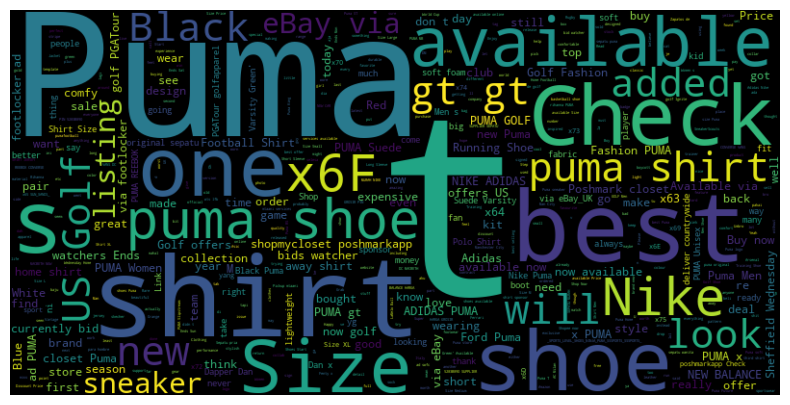

In [9]:
#Data Visualization Before Preprocessing
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df=' '.join(data['full_text'].tolist())

stopwords=set(STOPWORDS)
stopwords.update(['https','co','RT','...','amp'])

wc=WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(df)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

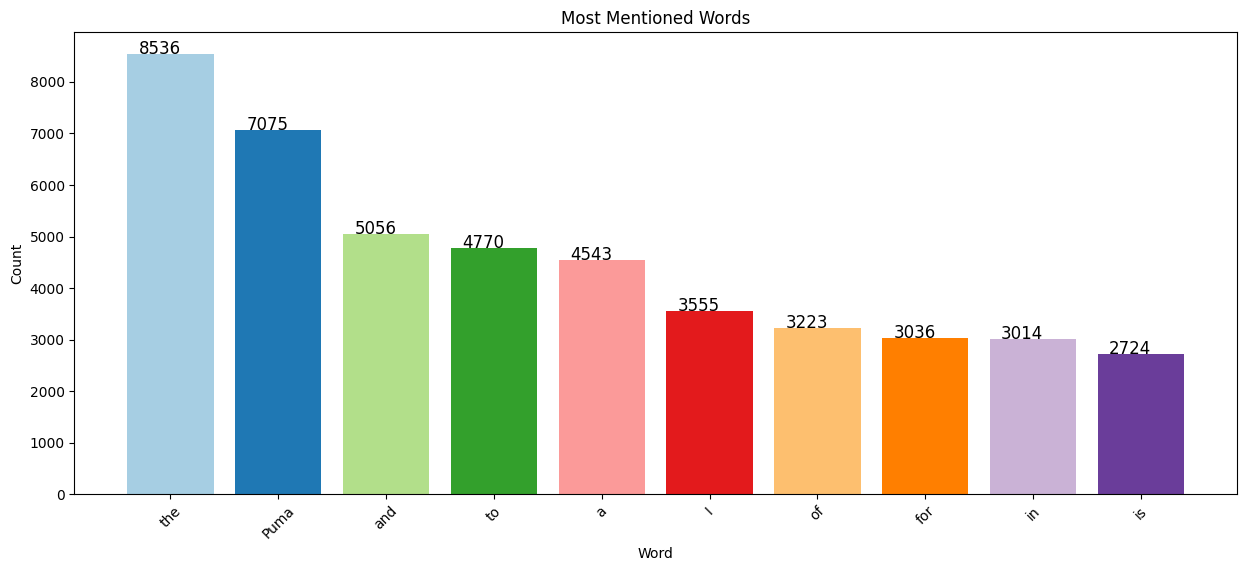

In [10]:
#Data Visualization Before Preprocessing
import matplotlib.pyplot as plt
from collections import Counter

text=" ".join(data["full_text"])
tokens = text.split()
word_counts= Counter(tokens)

top_words= word_counts.most_common(10)
word, count= zip(*top_words)

colors= plt.cm.Paired(range(len(word)))

plt.figure(figsize=(15, 6))
bars=plt.bar(word, count, color=colors)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most Mentioned Words")
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x()+ bar.get_width()/ 2 - 0.1, num + 1, str(num), fontsize=12, color="black", ha="center")

plt.show()

In [11]:
#DATA PREPROCESSING
df= pd.DataFrame(data[['created_at','full_text','username']])
df.head(5)

,created_at,full_text,username
0,Tue Feb 27 21:15:04 +0000 2024,Future Pumas! The time is here! Offers are ava...,BeNobleJCP
1,Tue Feb 27 16:19:16 +0000 2024,Today we unbox the @PUMA Fastroid Nitro sneake...,UnboxingWeb3
2,Tue Feb 27 14:03:21 +0000 2024,The new A-Style high-end helicopter controller...,AerosoftGmbH
3,Tue Feb 27 12:00:25 +0000 2024,The Puma suede is a classic style crafted from...,casualclassics
4,Tue Feb 27 11:00:32 +0000 2024,Are you looking for a clinical modular soundpr...,hearbuy


In [12]:
df.to_csv('Pumadataset_cutcol.csv', index=False)

In [13]:
#CLEANING
data=pd.read_csv('Pumadataset_cutcol.csv')
data.head(5)

,created_at,full_text,username
0,Tue Feb 27 21:15:04 +0000 2024,Future Pumas! The time is here! Offers are ava...,BeNobleJCP
1,Tue Feb 27 16:19:16 +0000 2024,Today we unbox the @PUMA Fastroid Nitro sneake...,UnboxingWeb3
2,Tue Feb 27 14:03:21 +0000 2024,The new A-Style high-end helicopter controller...,AerosoftGmbH
3,Tue Feb 27 12:00:25 +0000 2024,The Puma suede is a classic style crafted from...,casualclassics
4,Tue Feb 27 11:00:32 +0000 2024,Are you looking for a clinical modular soundpr...,hearbuy


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14560 entries, 0 to 14559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  14560 non-null  object
 1   full_text   14560 non-null  object
 2   username    14558 non-null  object
dtypes: object(3)
memory usage: 341.4+ KB


In [15]:
#remove duplicate data entries
data.drop_duplicates(subset="full_text", keep='first', inplace=True)

In [16]:
data.info() #to check have duplicates or not

<class 'pandas.core.frame.DataFrame'>
Index: 13834 entries, 0 to 14559
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  13834 non-null  object
 1   full_text   13834 non-null  object
 2   username    13833 non-null  object
dtypes: object(3)
memory usage: 432.3+ KB


In [17]:
df= pd.DataFrame(data[['created_at','username','full_text']])
df.head(10)

,created_at,username,full_text
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...
5,Tue Feb 27 09:40:12 +0000 2024,SneakerScouts,Dapper Dan x PUMA Suede 'Varsity Green' Availa...
6,Tue Feb 27 05:21:57 +0000 2024,JustFittz,Puma shades available in our stores. https://t...
7,Mon Feb 26 19:01:32 +0000 2024,FootyInfographs,🇲🇽 Hugo Sánchez is perhaps the greatest Mexica...
8,Mon Feb 26 18:02:43 +0000 2024,theonestophtx,2019/2020 Puma Jadon Sancho Dortmund Away Jers...
9,Mon Feb 26 18:00:29 +0000 2024,Farmstar_Ltd,𝗠𝗔𝗖𝗛𝗜𝗡𝗘 𝗢𝗙 𝗧𝗛𝗘 𝗪𝗘𝗘𝗞 ‼️ Used Case IH Puma 220 C...


In [18]:
import re 
import string
import nltk

def remove_URL(tweet):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',tweet)

def remove_mention(tweet):
    return re.sub(r'@\w+', '', tweet)

def remove_html(tweet):
    html=re.compile(r'<.*?>')
    return html.sub(r'',tweet)

def remove_emoji(tweet):
    emoji_pattern=re.compile("["
                             u"\U0001F600-\U0001F64F"
                             u"\U0001F300-\U0001F5FF"
                             u"\U0001F680-\U0001F6FF"
                             u"\U0001F1E0-\U0001F1FF"
                                                 "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',tweet)

def remove_numbers(tweet):
    tweet= re.sub(r'\d+','',tweet)
    return tweet

def remove_symbols(tweet):
    tweet= re.sub(r'[^a-zA-Z0-9\s]', '',tweet) #Eliminate all symbol
    return tweet

df['cleaning']= df['full_text'].apply(lambda x: remove_URL(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_mention(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning']= df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

,created_at,username,full_text,cleaning
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...,Future Pumas The time is here Offers are avail...
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...,Today we unbox the Fastroid Nitro sneaker wit...
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...,The new AStyle highend helicopter controllers ...
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...,The Puma suede is a classic style crafted from...
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...,Are you looking for a clinical modular soundpr...


In [19]:
#CASE FOLDING
def case_folding(text):
    if isinstance(text, str):
        lowercase_text=text.lower()
        return lowercase_text
    else:
        return text

df['case_folding']=df['cleaning'].apply(case_folding)
df.head(5)

,created_at,username,full_text,cleaning,case_folding
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...,Future Pumas The time is here Offers are avail...,future pumas the time is here offers are avail...
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...,Today we unbox the Fastroid Nitro sneaker wit...,today we unbox the fastroid nitro sneaker wit...
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...,The new AStyle highend helicopter controllers ...,the new astyle highend helicopter controllers ...
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...,The Puma suede is a classic style crafted from...,the puma suede is a classic style crafted from...
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...,Are you looking for a clinical modular soundpr...,are you looking for a clinical modular soundpr...


In [20]:
#TOKENIZATION
def tokenize(text):
    tokens=text.split()
    return tokens

df['tokenize']=df['case_folding'].apply(tokenize)
df.head(5)

,created_at,username,full_text,cleaning,case_folding,tokenize
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...,Future Pumas The time is here Offers are avail...,future pumas the time is here offers are avail...,"[future, pumas, the, time, is, here, offers, a..."
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...,Today we unbox the Fastroid Nitro sneaker wit...,today we unbox the fastroid nitro sneaker wit...,"[today, we, unbox, the, fastroid, nitro, sneak..."
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...,The new AStyle highend helicopter controllers ...,the new astyle highend helicopter controllers ...,"[the, new, astyle, highend, helicopter, contro..."
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...,The Puma suede is a classic style crafted from...,the puma suede is a classic style crafted from...,"[the, puma, suede, is, a, classic, style, craf..."
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...,Are you looking for a clinical modular soundpr...,are you looking for a clinical modular soundpr...,"[are, you, looking, for, a, clinical, modular,..."


In [21]:
#FILTERING/STOPWORD REMOVAL
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_id=stopwords.words('indonesian')
stop_words_en=stopwords.words('english')#option

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [22]:
# Combine the stopwords lists
combined_stop_words = set(stop_words_id + stop_words_en)

def remove_stopwords(text):
    return[word for word in text if word not in combined_stop_words]
    
df['StopWord Removal']=df['tokenize'].apply(lambda x:remove_stopwords(x))
df.head(5)

,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...,Future Pumas The time is here Offers are avail...,future pumas the time is here offers are avail...,"[future, pumas, the, time, is, here, offers, a...","[future, pumas, time, offers, available, join,..."
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...,Today we unbox the Fastroid Nitro sneaker wit...,today we unbox the fastroid nitro sneaker wit...,"[today, we, unbox, the, fastroid, nitro, sneak...","[today, unbox, fastroid, nitro, sneaker, avail..."
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...,The new AStyle highend helicopter controllers ...,the new astyle highend helicopter controllers ...,"[the, new, astyle, highend, helicopter, contro...","[new, astyle, highend, helicopter, controllers..."
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...,The Puma suede is a classic style crafted from...,the puma suede is a classic style crafted from...,"[the, puma, suede, is, a, classic, style, craf...","[puma, suede, classic, style, crafted, rich, s..."
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...,Are you looking for a clinical modular soundpr...,are you looking for a clinical modular soundpr...,"[are, you, looking, for, a, clinical, modular,...","[looking, clinical, modular, soundproof, booth..."


In [23]:
!pip install Sastrawi

In [24]:
#STEMMING
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
factory=StemmerFactory()
stemmer=factory.create_stemmer()

def stem_text(text):
    return[stemmer.stem(word) for word in text]

df['stemming_data']= df['StopWord Removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head(5)

,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal,stemming_data
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...,Future Pumas The time is here Offers are avail...,future pumas the time is here offers are avail...,"[future, pumas, the, time, is, here, offers, a...","[future, pumas, time, offers, available, join,...",future pumas time offers available join jcp fa...
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...,Today we unbox the Fastroid Nitro sneaker wit...,today we unbox the fastroid nitro sneaker wit...,"[today, we, unbox, the, fastroid, nitro, sneak...","[today, unbox, fastroid, nitro, sneaker, avail...",today unbox fastroid nitro sneaker available e...
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...,The new AStyle highend helicopter controllers ...,the new astyle highend helicopter controllers ...,"[the, new, astyle, highend, helicopter, contro...","[new, astyle, highend, helicopter, controllers...",new astyle highend helicopter controllers pro ...
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...,The Puma suede is a classic style crafted from...,the puma suede is a classic style crafted from...,"[the, puma, suede, is, a, classic, style, craf...","[puma, suede, classic, style, crafted, rich, s...",puma suede classic style crafted rich suede fe...
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...,Are you looking for a clinical modular soundpr...,are you looking for a clinical modular soundpr...,"[are, you, looking, for, a, clinical, modular,...","[looking, clinical, modular, soundproof, booth...",looking clinical modular soundproof booth puma...


In [28]:
from nltk.stem import WordNetLemmatizer

In [32]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokenize(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Lemmatize each word in the tokens list
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    # Return the list of lemmatized words
    return lemmatized_words

# Example usage:
df['lemmatized_tokens'] = df['stemming_data'].apply(lemmatize_tokenize)
df.head(5)

,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,lemmatized_text,lemmatized_tokens
0,Tue Feb 27 21:15:04 +0000 2024,BeNobleJCP,Future Pumas! The time is here! Offers are ava...,Future Pumas The time is here Offers are avail...,future pumas the time is here offers are avail...,"[future, pumas, the, time, is, here, offers, a...","[future, pumas, time, offers, available, join,...",future pumas time offers available join jcp fa...,future puma time offer available join jcp fami...,"[future, puma, time, offer, available, join, j..."
1,Tue Feb 27 16:19:16 +0000 2024,UnboxingWeb3,Today we unbox the @PUMA Fastroid Nitro sneake...,Today we unbox the Fastroid Nitro sneaker wit...,today we unbox the fastroid nitro sneaker wit...,"[today, we, unbox, the, fastroid, nitro, sneak...","[today, unbox, fastroid, nitro, sneaker, avail...",today unbox fastroid nitro sneaker available e...,today unbox fastroid nitro sneaker available e...,"[today, unbox, fastroid, nitro, sneaker, avail..."
2,Tue Feb 27 14:03:21 +0000 2024,AerosoftGmbH,The new A-Style high-end helicopter controller...,The new AStyle highend helicopter controllers ...,the new astyle highend helicopter controllers ...,"[the, new, astyle, highend, helicopter, contro...","[new, astyle, highend, helicopter, controllers...",new astyle highend helicopter controllers pro ...,new astyle highend helicopter controller pro f...,"[new, astyle, highend, helicopter, controller,..."
3,Tue Feb 27 12:00:25 +0000 2024,casualclassics,The Puma suede is a classic style crafted from...,The Puma suede is a classic style crafted from...,the puma suede is a classic style crafted from...,"[the, puma, suede, is, a, classic, style, craf...","[puma, suede, classic, style, crafted, rich, s...",puma suede classic style crafted rich suede fe...,puma suede classic style crafted rich suede fe...,"[puma, suede, classic, style, crafted, rich, s..."
4,Tue Feb 27 11:00:32 +0000 2024,hearbuy,Are you looking for a clinical modular soundpr...,Are you looking for a clinical modular soundpr...,are you looking for a clinical modular soundpr...,"[are, you, looking, for, a, clinical, modular,...","[looking, clinical, modular, soundproof, booth...",looking clinical modular soundproof booth puma...,looking clinical modular soundproof booth puma...,"[looking, clinical, modular, soundproof, booth..."


In [33]:
#EXPORT TO CSV
df.to_csv('Pumadataset_cleaned.csv', encoding='utf8', index=False)

In [34]:
#VISUALIZATION AFTER PREPROCESSING
df=pd.read_csv('Pumadataset_cleaned.csv')
df.tail(5)

,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,lemmatized_text,lemmatized_tokens
13829,Tue Nov 14 03:42:37 +0000 2023,malaysiandaily,Check out PUMA Unisex Redeem Profoam Running S...,Check out PUMA Unisex Redeem Profoam Running S...,check out puma unisex redeem profoam running s...,"['check', 'out', 'puma', 'unisex', 'redeem', '...","['check', 'puma', 'unisex', 'redeem', 'profoam...",check puma unisex redeem profoam running shoes...,check puma unisex redeem profoam running shoe ...,"['check', 'puma', 'unisex', 'redeem', 'profoam..."
13830,Tue Nov 14 03:42:26 +0000 2023,malaysiandaily,Check out [NEW] PUMA Carina Leather Women's Sh...,Check out NEW PUMA Carina Leather Womens Shoes...,check out new puma carina leather womens shoes...,"['check', 'out', 'new', 'puma', 'carina', 'lea...","['check', 'new', 'puma', 'carina', 'leather', ...",check new puma carina leather womens shoes whi...,check new puma carina leather woman shoe white...,"['check', 'new', 'puma', 'carina', 'leather', ..."
13831,Tue Nov 14 03:42:15 +0000 2023,malaysiandaily,Check out [NEW] PUMA Retaliate Tongue Men's Ru...,Check out NEW PUMA Retaliate Tongue Mens Runni...,check out new puma retaliate tongue mens runni...,"['check', 'out', 'new', 'puma', 'retaliate', '...","['check', 'new', 'puma', 'retaliate', 'tongue'...",check new puma retaliate tongue mens running s...,check new puma retaliate tongue men running sh...,"['check', 'new', 'puma', 'retaliate', 'tongue'..."
13832,Tue Nov 14 03:42:00 +0000 2023,malaysiandaily,Check out [NEW] PUMA Retaliate Tongue Men's Ru...,Check out NEW PUMA Retaliate Tongue Mens Runni...,check out new puma retaliate tongue mens runni...,"['check', 'out', 'new', 'puma', 'retaliate', '...","['check', 'new', 'puma', 'retaliate', 'tongue'...",check new puma retaliate tongue mens running s...,check new puma retaliate tongue men running sh...,"['check', 'new', 'puma', 'retaliate', 'tongue'..."
13833,Mon Nov 13 22:51:48 +0000 2023,JessiJones3701,Ever aware any good. Your future is a weapon w...,Ever aware any good Your future is a weapon wh...,ever aware any good your future is a weapon wh...,"['ever', 'aware', 'any', 'good', 'your', 'futu...","['ever', 'aware', 'good', 'future', 'weapon', ...",ever aware good future weapon whose ampxampxam...,ever aware good future weapon whose ampxampxam...,"['ever', 'aware', 'good', 'future', 'weapon', ..."


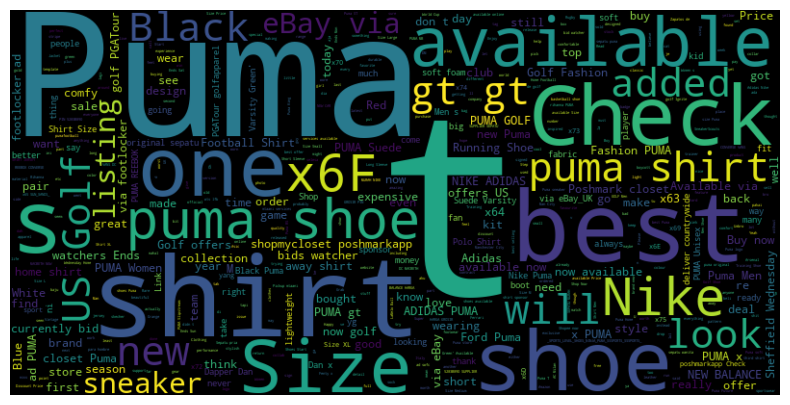

In [35]:
#VISUALIZATION AFTER PREPROCESSING
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text=' '.join(df['lemmatized_text'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

wordcloud=WordCloud(width=800,height=400, background_color='black').generate(text)


plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

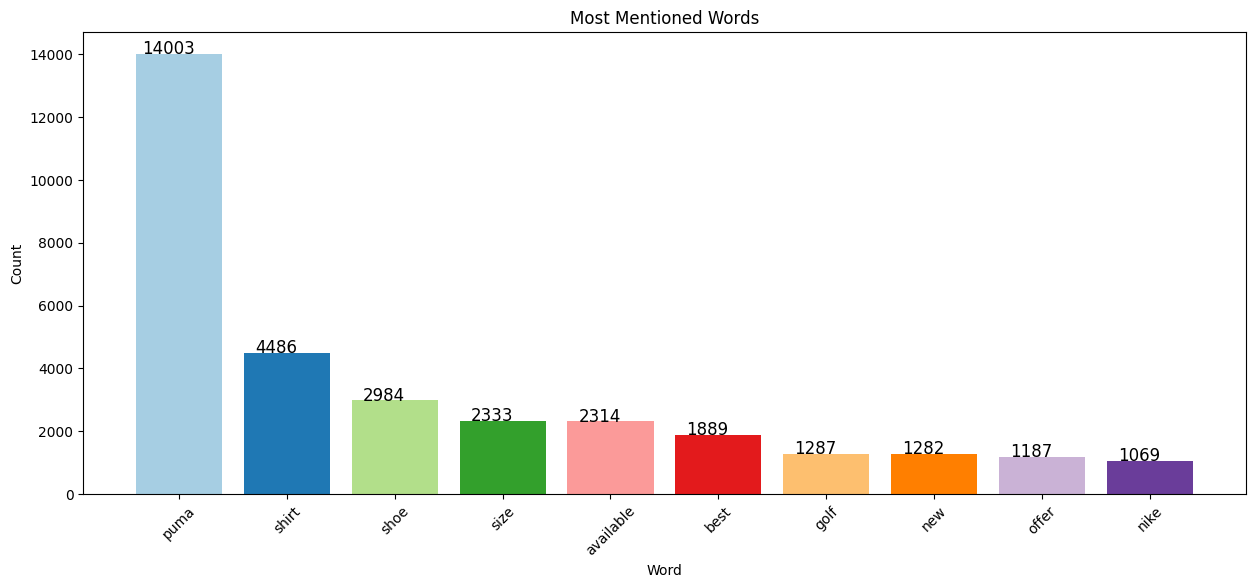

In [36]:
import matplotlib.pyplot as plt
from collections import Counter

text=" ".join(df["lemmatized_text"].apply(lambda x:str(x) if isinstance(x, (str,int, float)) else ''))
tokens = text.split()
word_counts= Counter(tokens)

top_words= word_counts.most_common(10)
word, count= zip(*top_words)

colors= plt.cm.Paired(range(len(word)))

plt.figure(figsize=(15, 6))
bars=plt.bar(word, count, color=colors)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Most Mentioned Words")
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x()+ bar.get_width()/ 2 - 0.1, num + 1, str(num), fontsize=12, color="black", ha="center")

plt.show()